In [1]:
import os
import random
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

In [13]:
import matplotlib.pyplot as plt

In [11]:
from PIL import Image

In [2]:
## google drive에서 압축된 dataset download
import gdown
url = 'https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: /content/oxford_pet.zip
100%|██████████| 811M/811M [00:05<00:00, 153MB/s]


'oxford_pet.zip'

In [3]:
## 압축풀기
!unzip -q oxford_pet.zip -d oxford_pet

In [4]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [5]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']

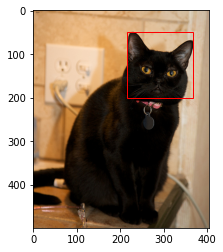

In [20]:
rnd_idx = random.randint(1, len(bbox_files))

bbox_name = bbox_files[rnd_idx]
bbox_path = os.path.join(bbox_dir, bbox_name)
tree = et.parse(bbox_path)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

fname = os.path.splitext(bbox_name)[0] + '.jpg'
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)

bbox_name = os.path.splitext(fname)[0] + '.xml'

fig, ax = plt.subplots(1, 1)
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
ax.add_patch(rect)
ax.imshow(image)
plt.show()

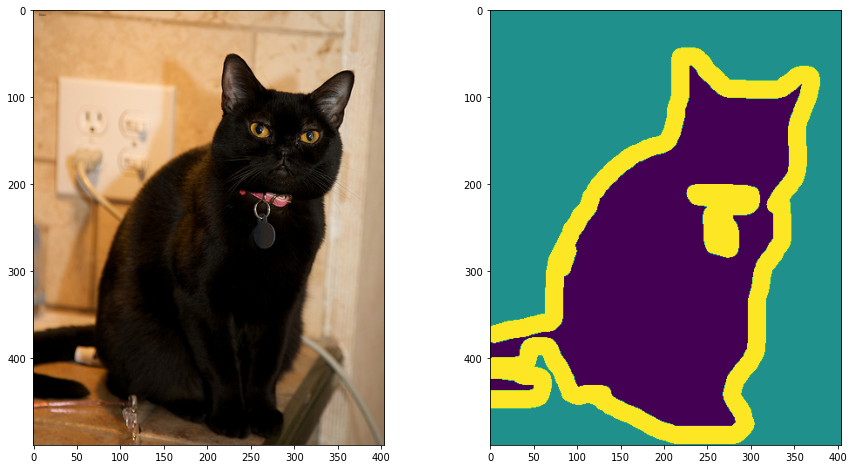

In [21]:
sname = os.path.splitext(bbox_name)[0] + '.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)

fig, ax = plt.subplots(1, 2, figsize=(15,8))

ax[0].imshow(image)
ax[1].imshow(seg)
plt.show()

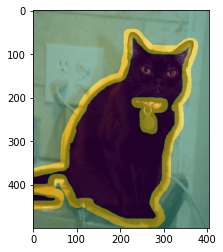

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(image)
ax.imshow(seg, alpha=0.5)
plt.show()